In [1]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms as T, models
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary
from tqdm.notebook import tqdm 

from sklearn.metrics import classification_report, recall_score, accuracy_score, precision_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from random import shuffle, randint, choice
import numpy as np
import cv2 as cv
from glob import glob
import pandas as pd
import os

c:\Users\Josiah Foo\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
sns.set_theme()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
with torch.no_grad():
    torch.cuda.empty_cache()

In [3]:
fundus_df = pd.DataFrame(columns=['filepath', 'label'])

folder_path = "Fundus Images"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # print(file)

        new_row = {'filepath': folder_path + '/' + file, 'label': 1}

        fundus_df = pd.concat([fundus_df, pd.DataFrame([new_row])])

fundus_df.reset_index(drop=True, inplace=True)
print(fundus_df.shape)
print(fundus_df.head())

animals_df = pd.DataFrame(columns=['filepath', 'label'])

folder_path = "Animals"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # print(file)

        new_row = {'filepath': folder_path + '/' + file, 'label': 0}

        animals_df = pd.concat([animals_df, pd.DataFrame([new_row])])

animals_df.reset_index(drop=True, inplace=True)
print(animals_df.shape)
print(animals_df.head())

food_df = pd.DataFrame(columns=['filepath', 'label'])

folder_path = "Food"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # print(file)

        new_row = {'filepath': folder_path + '/' + file, 'label': 0}

        food_df = pd.concat([food_df, pd.DataFrame([new_row])])

food_df.reset_index(drop=True, inplace=True)
print(food_df.shape)
print(food_df.head())

people_df = pd.DataFrame(columns=['filepath', 'label'])

folder_path = "People"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # print(file)

        new_row = {'filepath': folder_path + '/' + file, 'label': 0}

        people_df = pd.concat([people_df, pd.DataFrame([new_row])])

people_df.reset_index(drop=True, inplace=True)
print(people_df.shape)
print(people_df.head())

plants_df = pd.DataFrame(columns=['filepath', 'label'])

folder_path = "Plants"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # print(file)

        new_row = {'filepath': folder_path + '/' + file, 'label': 0}

        plants_df = pd.concat([plants_df, pd.DataFrame([new_row])])

plants_df.reset_index(drop=True, inplace=True)
print(plants_df.shape)
print(plants_df.head())

(23071, 2)
                filepath label
0  Fundus Images/001.jpg     1
1  Fundus Images/002.jpg     1
2  Fundus Images/003.jpg     1
3  Fundus Images/004.jpg     1
4  Fundus Images/005.jpg     1
(4096, 2)
                 filepath label
0  Animals/0009fc27d9.jpg     0
1  Animals/000d3a9260.jpg     0
2  Animals/000ef44b56.jpg     0
3  Animals/0014c2d720.jpg     0
4  Animals/00196e8fac.jpg     0
(3347, 2)
             filepath label
0    Food/Bread_0.jpg     0
1    Food/Bread_1.jpg     0
2   Food/Bread_10.jpg     0
3  Food/Bread_100.jpg     0
4  Food/Bread_101.jpg     0
(2054, 2)
                filepath label
0     People/image_1.jpg     0
1    People/image_10.jpg     0
2   People/image_100.jpg     0
3  People/image_1000.jpg     0
4  People/image_1002.jpg     0
(30000, 2)
                 filepath label
0    Plants/aloevera0.jpg     0
1    Plants/aloevera1.jpg     0
2   Plants/aloevera10.jpg     0
3  Plants/aloevera100.jpg     0
4  Plants/aloevera101.jpg     0


In [4]:
final_df = pd.concat([fundus_df, animals_df, food_df, people_df, plants_df], ignore_index=True)
print(final_df.head())
print(final_df.shape)
print(final_df['label'].value_counts())

                filepath label
0  Fundus Images/001.jpg     1
1  Fundus Images/002.jpg     1
2  Fundus Images/003.jpg     1
3  Fundus Images/004.jpg     1
4  Fundus Images/005.jpg     1
(62568, 2)
label
0    39497
1    23071
Name: count, dtype: int64


In [5]:
initial_label_0_df = final_df[final_df['label'] == 0]
initial_label_1_df = final_df[final_df['label'] == 1]

label_0_df = initial_label_0_df.sample(n = 500, random_state = 42)
label_1_df = initial_label_1_df.sample(n = 500, random_state = 42)

In [6]:
label0_train, label0_valid = train_test_split(label_0_df, test_size=0.2, random_state=42)
label1_train, label1_valid = train_test_split(label_1_df, test_size=0.2, random_state=42)

train_df = pd.concat([label0_train, label1_train]).sample(frac=1, random_state=42)
valid_df = pd.concat([label0_valid, label1_valid]).sample(frac=1, random_state=42)

print(train_df['label'].value_counts())
print(valid_df['label'].value_counts())

train_df.reset_index(drop=True, inplace=True)
valid_df.reset_index(drop=True, inplace=True)

label
1    400
0    400
Name: count, dtype: int64
label
0    100
1    100
Name: count, dtype: int64


In [7]:
# for row in valid_df.iterrows():
#     image_name = row[1]['filepath']
#     image_label = row[1]['label']
#     filepath = image_name

#     exists = os.path.exists(filepath)
#     if not exists:
#         print(image_name)
#         print(os.path.exists(filepath))
#     if image_label not in [0, 1]:
#         print(image_label)

In [8]:
class EyeDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.transform = T.Compose([
            T.Resize([224, 224]),
            T.ToTensor(),
            T.Normalize((0.485, 0.456, 0.406),
                       (0.229, 0.224, 0.225))
        ])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        filepath = f"{self.df.iloc[idx]['filepath']}"
#         image = Image.open(filepath)
        image = cv.imread(filepath)
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
        image = Image.fromarray(image)
        target = self.df.iloc[idx]['label']
        
        return image, target
    
    def transform_img(self, img):
        return self.transform(img)
    
    def collate_fn(self, data):
        imgs, targets = zip(*data)
        targets = torch.tensor(targets)
        targets = targets.view(-1, 1).float()
        targets = targets.to(device)
        imgs = torch.stack(
            [self.transform_img(img) for img in imgs], 0
        ).to(device)
        return imgs, targets

In [9]:
train_ds = EyeDataset(train_df)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True,
                      collate_fn=train_ds.collate_fn, 
                      drop_last=True)

valid_ds = EyeDataset(valid_df)
valid_dl = DataLoader(valid_ds, batch_size=64,
                      collate_fn=valid_ds.collate_fn)

In [10]:
print('Size of Train:', len(train_ds))
print('Size of Validation:', len(valid_ds))

Size of Train: 800
Size of Validation: 200


In [11]:
class EyeClassifier(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        self.model = models.resnet50(pretrained=pretrained, progress=pretrained)
        for param in self.model.parameters():
            param.requires_grad = True
        
        num_features = self.model.fc.in_features

        self.model.fc = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(num_features),
            nn.Dropout(0.5),
            nn.Linear(num_features, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [12]:
classifier = EyeClassifier(pretrained=True)
_ = summary(classifier, torch.ones(1,3,224,224))

c:\Users\Josiah Foo\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Josiah Foo\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
├─ResNet: 1-1                            [-1, 1]                   --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        9,408
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        128
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─Sequential: 2-5                   [-1, 256, 56, 56]         --
|    |    └─Bottleneck: 3-1              [-1, 256, 56, 56]         75,008
|    |    └─Bottleneck: 3-2              [-1, 256, 56, 56]         70,400
|    |    └─Bottleneck: 3-3              [-1, 256, 56, 56]         70,400
|    └─Sequential: 2-6                   [-1, 512, 28, 28]         --
|    |    └─Bottleneck: 3-4              [-1, 512, 28, 28]         379,392
|    |    └─Bottleneck: 3-5              [-1, 512, 28, 28]         280,064
|    |    └─Bottleneck: 3-6              [-1, 512, 28, 28] 

In [13]:
def train(data, classifier, optimizer, loss_fn):
    classifier.train()
    imgs, targets = data
    #print(type(imgs.to(device)))
    outputs = classifier(imgs.to(device))
    loss = loss_fn(outputs.to(device), targets.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    outputs = outputs.cpu().detach().tolist()
    targets = targets.cpu().detach().tolist()
    preds = list(map(lambda x: int(x[0] > 0.5), outputs))
    fake_recall_score = recall_score(targets, preds, 
                               pos_label=0,
                               zero_division=0)
    fake_accuracy_score = accuracy_score(targets, preds)
    fake_precision_score = precision_score(targets, preds, pos_label=0,zero_division=0)
    fake_f1_score = f1_score(targets, preds, pos_label=0,zero_division=0)
    fpr, tpr, thresholds = roc_curve(targets, outputs)
    roc_auc = auc(fpr, tpr)
    
    return loss.cpu().detach().item(), fake_recall_score, fake_accuracy_score, fake_precision_score, fake_f1_score, fpr, tpr, roc_auc

In [14]:
@torch.no_grad()
def validate(data, classifier, loss_fn):
    classifier.eval()
    imgs, targets = data
    outputs = classifier(imgs.to(device))
    loss = loss_fn(outputs.to(device), targets.to(device))
    
    outputs = outputs.cpu().detach().tolist()
    targets = targets.cpu().detach().tolist()
    preds = list(map(lambda x: int(x[0] > 0.5), outputs))
    fake_recall_score = recall_score(targets, preds, 
                               pos_label=0,
                               zero_division=0)
    fake_accuracy_score = accuracy_score(targets, preds)
    fake_precision_score = precision_score(targets, preds, pos_label=0,zero_division=0)
    fake_f1_score = f1_score(targets, preds, pos_label=0,zero_division=0)
    fpr, tpr, thresholds = roc_curve(targets, outputs)
    roc_auc = auc(fpr, tpr)
    
    return loss.cpu().detach().item(), fake_recall_score, fake_accuracy_score, fake_precision_score, fake_f1_score, fpr, tpr, roc_auc

In [15]:
classifier = EyeClassifier(pretrained=True).to(device)
loss_fn = nn.BCELoss().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2,
                                      gamma=0.25)
best_recall_score = 0
# lowest_loss_score = float('inf')
n_epochs = 15
xticks = list(i+1 for i in range(n_epochs))

In [16]:
mem = {
    'train_loss': [],
    'train_recall_score': [],
    'train_accuracy_score': [],
    'train_precision_score': [],
    'train_f1_score': [],
    'train_tpr': [],
    'train_fpr': [],
    'train_auc': [],
    'valid_loss': [],
    'valid_recall_score': [],
    'valid_accuracy_score': [],
    'valid_precision_score': [],
    'valid_f1_score': [],
    'valid_tpr': [],
    'valid_fpr': [],
    'valid_auc': [],
}

for epoch in tqdm(range(n_epochs), desc='Training'):
    n_batch = len(train_dl)
    train_losses, train_recall_scores, train_accuracy_scores, train_precision_scores, train_f1_scores, train_tprs, train_fprs, train_aucs = [], [], [], [], [], [], [], []
    for i, data in enumerate(train_dl):
        train_loss, train_recall_score, train_accuracy_score, train_precision_score, train_f1_score, train_tpr, train_fpr, train_auc = train(data, classifier, optimizer, loss_fn)
        train_losses.append(train_loss)
        train_recall_scores.append(train_recall_score)
        train_accuracy_scores.append(train_accuracy_score)
        train_precision_scores.append(train_precision_score)
        train_f1_scores.append(train_f1_score)
        train_tprs.append(train_tpr)
        train_fprs.append(train_fpr)
        train_aucs.append(train_auc)
        pos = epoch + ((i+1)/n_batch)
        print(
            'epoch:', "%.3f" % pos,
            '\ttrain loss:', "%.3f" % train_loss,
            '\ttrain recall score:', "%.3f" % train_recall_score, 
            '\ttrain accuracy score:', "%.3f" % train_accuracy_score, 
            '\ttrain precision score:', "%.3f" % train_precision_score, 
            '\ttrain f1 score:', "%.3f" % train_f1_score, 
            '\ttrain auc:', "%.3f" % train_auc, 
            end='\r'
        )
        
    mem['train_loss'].append(np.mean(train_losses))
    mem['train_recall_score'].append(np.mean(train_recall_scores))
    mem['train_accuracy_score'].append(np.mean(train_accuracy_scores))
    mem['train_precision_score'].append(np.mean(train_precision_scores))
    mem['train_f1_score'].append(np.mean(train_f1_scores))
    mem['train_tpr'].append(np.concatenate(train_fprs))
    mem['train_fpr'].append(np.concatenate(train_tprs))
    mem['train_auc'].append(np.mean(train_aucs))
    
    n_batch = len(valid_dl)
    valid_losses, valid_recall_scores, valid_f1_scores, valid_accuracy_scores, valid_precision_scores, valid_tprs, valid_fprs, valid_aucs =  [], [], [], [], [], [], [], []
    for i, data in enumerate(valid_dl):
        valid_loss, valid_recall_score, valid_accuracy_score, valid_precision_score, valid_f1_score, valid_tpr, valid_fpr, valid_auc = validate(data, classifier, loss_fn)
        valid_losses.append(valid_loss)
        valid_recall_scores.append(valid_recall_score)
        valid_accuracy_scores.append(valid_accuracy_score)
        valid_precision_scores.append(valid_precision_score)
        valid_f1_scores.append(valid_f1_score)
        valid_tprs.append(valid_tpr)
        valid_fprs.append(valid_fpr)
        valid_aucs.append(valid_auc)
        pos = epoch + ((i+1)/n_batch)
        print(
            'epoch:', "%.3f" % pos,
            '\tvalid loss:', "%.3f" % valid_loss,
            '\tvalid recall score:', "%.3f" % valid_recall_score, 
            '\tvalid accuracy score:', "%.3f" % valid_accuracy_score, 
            '\tvalid precision score:', "%.3f" % valid_precision_score, 
            '\tvalid f1 score:', "%.3f" % valid_f1_score, 
            '\tvalid auc:', "%.3f" % valid_auc, 
            end='\r'
        )
    
    # cur_auc_score = np.mean(valid_aucs)
    cur_recall_score = np.mean(valid_recall_scores)
    mem['valid_loss'].append(np.mean(valid_losses))
    mem['valid_recall_score'].append(np.mean(valid_recall_scores))
    mem['valid_accuracy_score'].append(np.mean(valid_accuracy_scores))
    mem['valid_precision_score'].append(np.mean(valid_precision_scores))
    mem['valid_f1_score'].append(np.mean(valid_f1_scores))
    mem['valid_tpr'].append(np.concatenate(valid_fprs))
    mem['valid_fpr'].append(np.concatenate(valid_tprs))
    mem['valid_auc'].append(np.mean(valid_aucs))
    
    print(
        'epoch:', epoch+1,
        '\ttrain loss:', "%.3f" % mem['train_loss'][-1],
        '\ttrain recall score:', "%.3f" % mem['train_recall_score'][-1],
        '\ttrain accuracy score:', "%.3f" % mem['train_accuracy_score'][-1],
        '\ttrain precision score:', "%.3f" % mem['train_precision_score'][-1],
        '\ttrain f1 score:', "%.3f" % mem['train_f1_score'][-1],
        '\ttrain auc:', "%.3f" % mem['train_auc'][-1],
        '\tvalid loss:', "%.3f" % mem['valid_loss'][-1],
        '\tvalid recall score:', "%.3f" % mem['valid_recall_score'][-1],
        '\tvalid accuracy score:', "%.3f" % mem['valid_accuracy_score'][-1],
        '\tvalid precision score:', "%.3f" % mem['valid_precision_score'][-1],
        '\tvalid f1 score:', "%.3f" % mem['valid_f1_score'][-1],
        '\tvalid auc:', "%.3f" % mem['valid_auc'][-1],
    )
    
    # if best_auc_score < cur_auc_score:
    #     best_auc_score = cur_auc_score
    #     torch.save(classifier.state_dict(), 'glaucoma_state_dict_v3.pth')
    #     torch.save(classifier, 'glaucoma_model_v3.pth')
    
    if epoch > 5 and best_recall_score < cur_recall_score:
        best_recall_score = cur_recall_score
        torch.save(classifier.state_dict(), 'validation_state_dict_final.pth')
        torch.save(classifier, 'validation_model_final.pth')
        
    scheduler.step()

Training:   0%|          | 0/15 [00:00<?, ?it/s]

epoch: 1 	train loss: 0.081 	train recall score: 0.961 	train accuracy score: 0.958 	train precision score: 0.962 	train f1 score: 0.961 	train auc: 0.966 	valid loss: 0.011 	valid recall score: 1.000 	valid accuracy score: 1.000 	valid precision score: 1.000 	valid f1 score: 1.000 	valid auc: 1.000
epoch: 2 	train loss: 0.000 	train recall score: 1.000 	train accuracy score: 1.000 	train precision score: 1.000 	train f1 score: 1.000 	train auc: 1.000 	valid loss: 0.000 	valid recall score: 1.000 	valid accuracy score: 1.000 	valid precision score: 1.000 	valid f1 score: 1.000 	valid auc: 1.000
epoch: 3 	train loss: 0.000 	train recall score: 1.000 	train accuracy score: 1.000 	train precision score: 1.000 	train f1 score: 1.000 	train auc: 1.000 	valid loss: 0.000 	valid recall score: 1.000 	valid accuracy score: 1.000 	valid precision score: 1.000 	valid f1 score: 1.000 	valid auc: 1.000
epoch: 4 	train loss: 0.000 	train recall score: 1.000 	train accuracy score: 1.000 	train precis

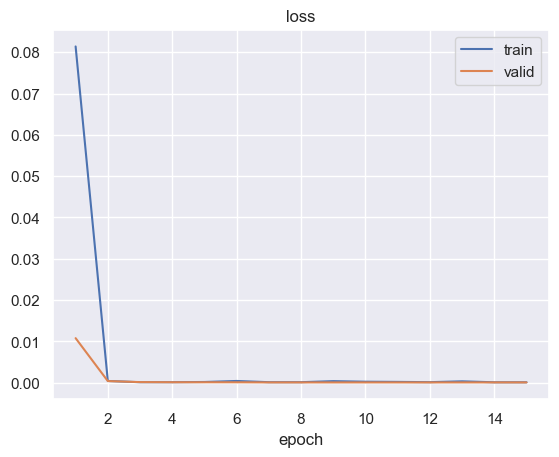

In [17]:
plt.plot(xticks, mem['train_loss'])
plt.plot(xticks, mem['valid_loss'])
plt.legend(['train', 'valid'])
plt.xlabel('epoch')
plt.title('loss')
plt.show()

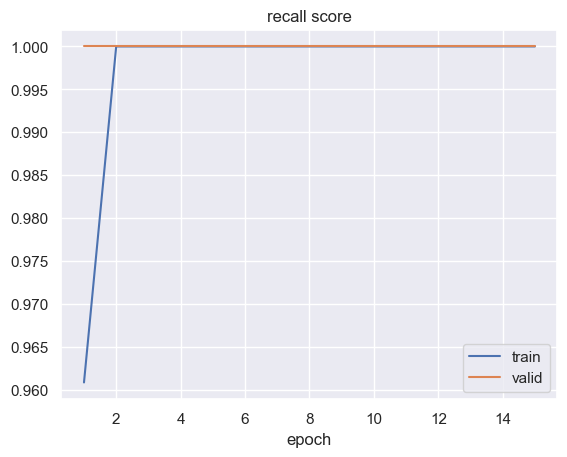

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [18]:
plt.plot(xticks, mem['train_recall_score'])
plt.plot(xticks, mem['valid_recall_score'])
plt.legend(['train', 'valid'])
plt.xlabel('epoch')
plt.title('recall score')
plt.show()
print(mem['valid_recall_score'])

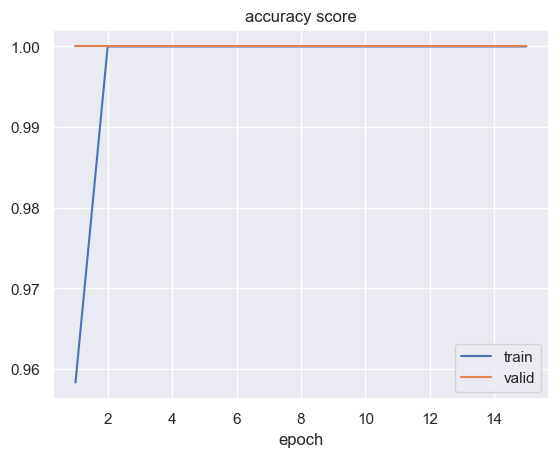

In [19]:
plt.plot(xticks, mem['train_accuracy_score'])
plt.plot(xticks, mem['valid_accuracy_score'])
plt.legend(['train', 'valid'])
plt.xlabel('epoch')
plt.title('accuracy score')
plt.show()

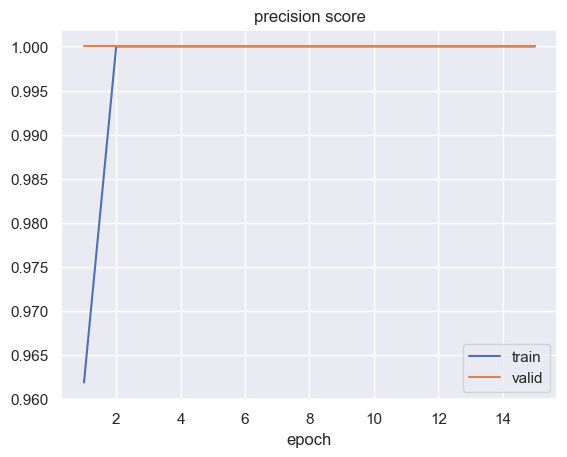

In [20]:
plt.plot(xticks, mem['train_precision_score'])
plt.plot(xticks, mem['valid_precision_score'])
plt.legend(['train', 'valid'])
plt.xlabel('epoch')
plt.title('precision score')
plt.show()

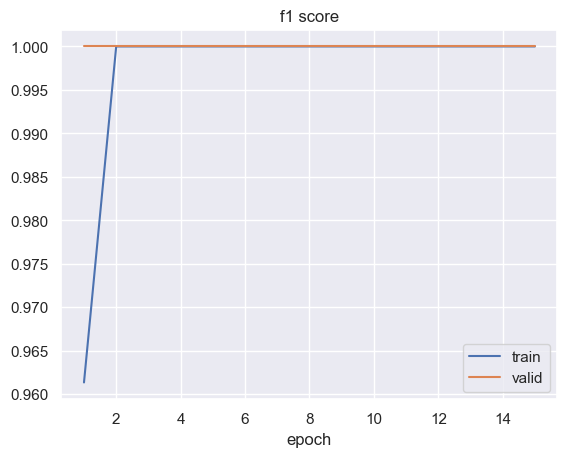

In [21]:
plt.plot(xticks, mem['train_f1_score'])
plt.plot(xticks, mem['valid_f1_score'])
plt.legend(['train', 'valid'])
plt.xlabel('epoch')
plt.title('f1 score')
plt.show()

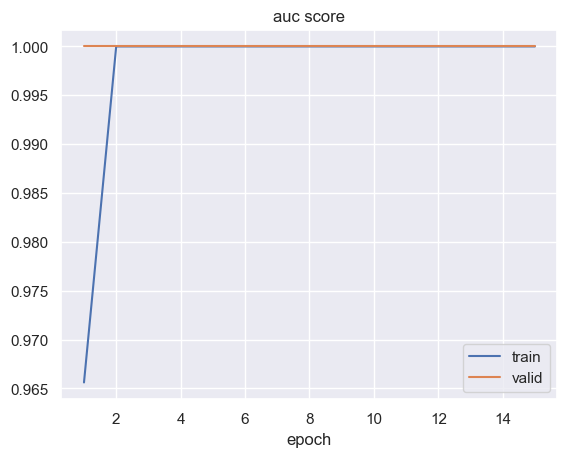

In [22]:
plt.plot(xticks, mem['train_auc'])
plt.plot(xticks, mem['valid_auc'])
plt.legend(['train', 'valid'])
plt.xlabel('epoch')
plt.title('auc score')
plt.show()

In [23]:
# model = EyeClassifier()
# model.load_state_dict(torch.load('validation_state_dict.pth'))
# model.eval()

# accuracy_list = []
# recall_score_list = []

# test_label_0_df = initial_label_0_df.sample(n = 5000, random_state = 21)
# test_label_1_df = initial_label_1_df.sample(n = 5000, random_state = 21)

# test_df = pd.concat([test_label_0_df, test_label_1_df], ignore_index=True)

# test_ds = EyeDataset(test_df)
# test_dl = DataLoader(test_ds, batch_size=64, shuffle=True,
#                       collate_fn=test_ds.collate_fn, 
#                       drop_last=True)

# for i, data in enumerate(test_dl):
#     with torch.no_grad():
#         model.eval()
#         imgs, targets = data
#         outputs = classifier(imgs.to(device))
       

#         outputs = outputs.cpu().detach().tolist()
#         targets = targets.cpu().detach().tolist()
#         # print("TARGETS")
#         # print(targets)
#         # print("OUTPUTS")
#         # print(outputs)

#         preds = list(map(lambda x: int(x[0] > 0.5), outputs))
#         # print(preds)
#         accuracy = accuracy_score(targets, preds)
#         recall = recall_score(targets, preds, 
#                                pos_label=0,
#                                zero_division=0)
#         accuracy_list.append(accuracy)
#         recall_score_list.append(recall)

# print("FINAL RESULTS")
# print(np.mean(accuracy_list))
# print(np.mean(recall_score_list))


# # @torch.no_grad()
# # def validate(data, classifier, loss_fn):
# #     classifier.eval()
# #     imgs, targets = data
# #     outputs = classifier(imgs.to(device))
# #     loss = loss_fn(outputs.to(device), targets.to(device))
    
# #     outputs = outputs.cpu().detach().tolist()
# #     targets = targets.cpu().detach().tolist()
# #     preds = list(map(lambda x: int(x[0] > 0.5), outputs))
# #     fake_recall_score = recall_score(targets, preds, 
# #                                pos_label=0,
# #                                zero_division=0)
    
# #     return loss.cpu().detach().item(), fake_recall_score
    